In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [5]:
figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
lw = np.array([0, -75, -75])
up = np.array([20, 75, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUChamferModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [6]:
mcu_model.train()
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.001415828114168878


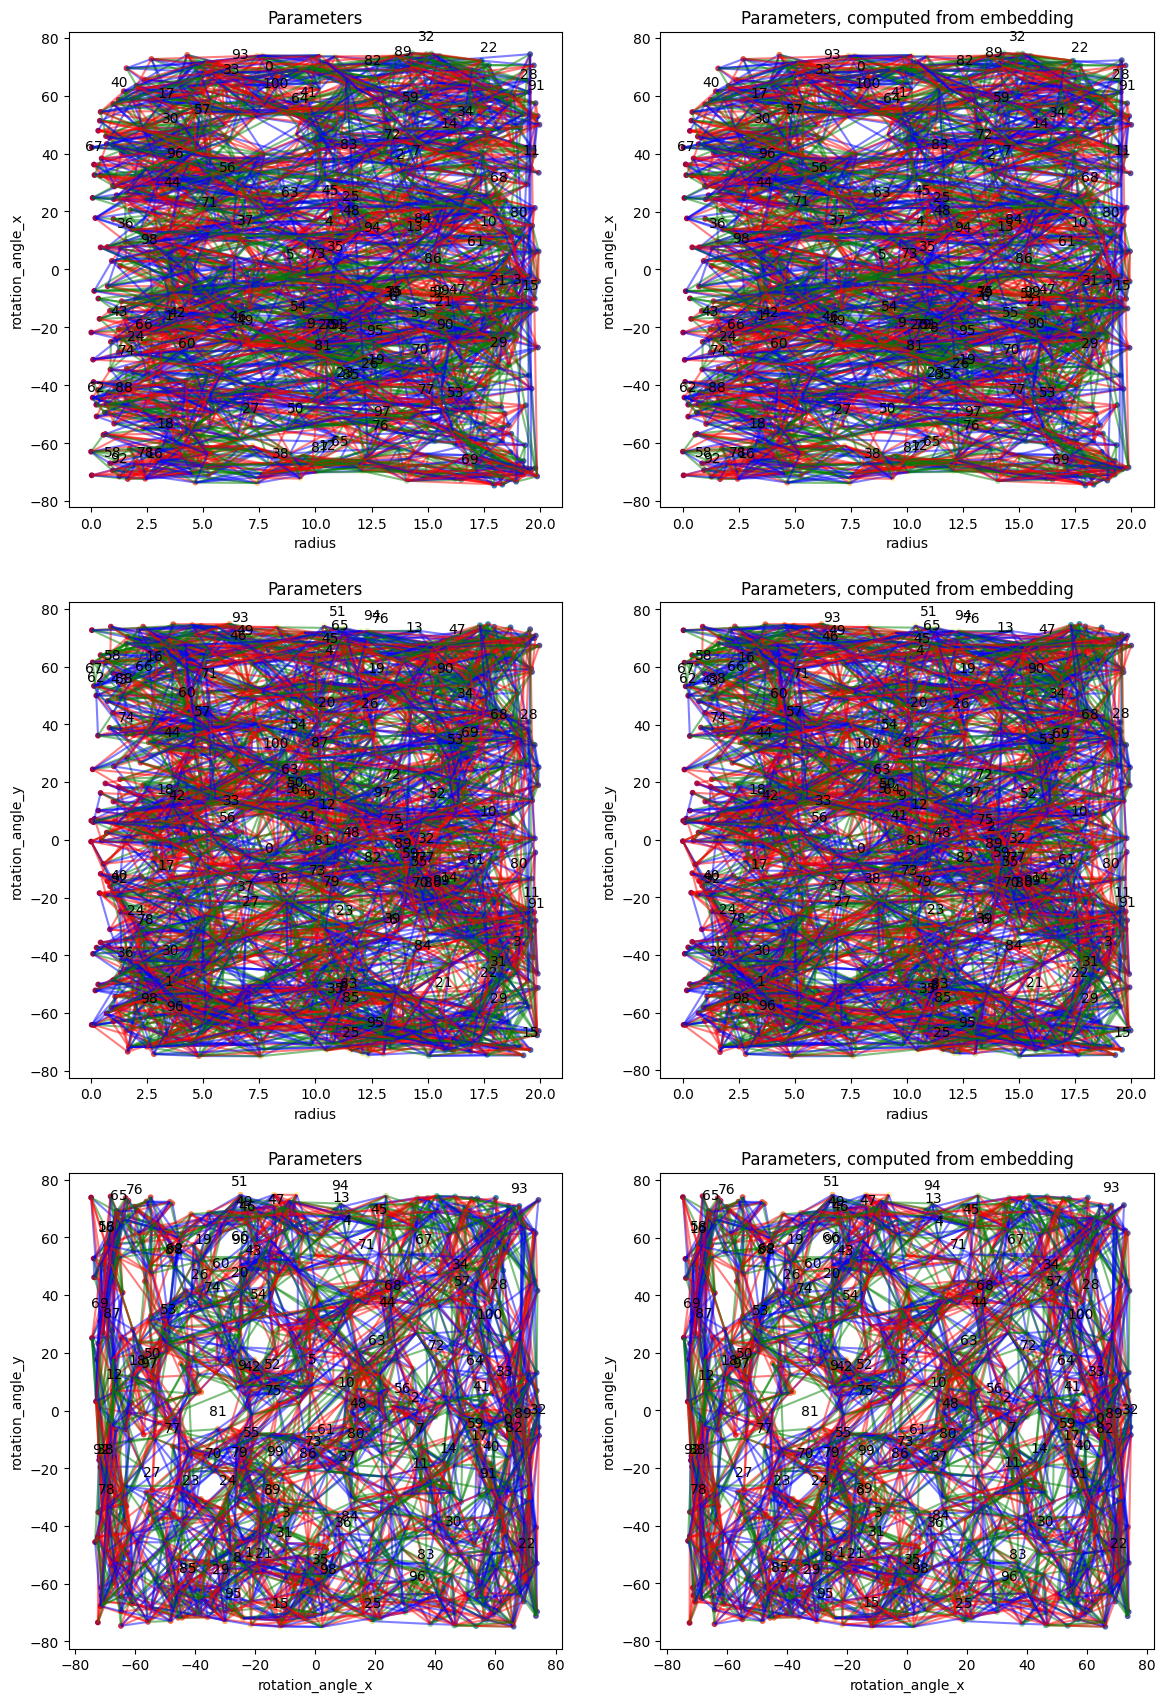

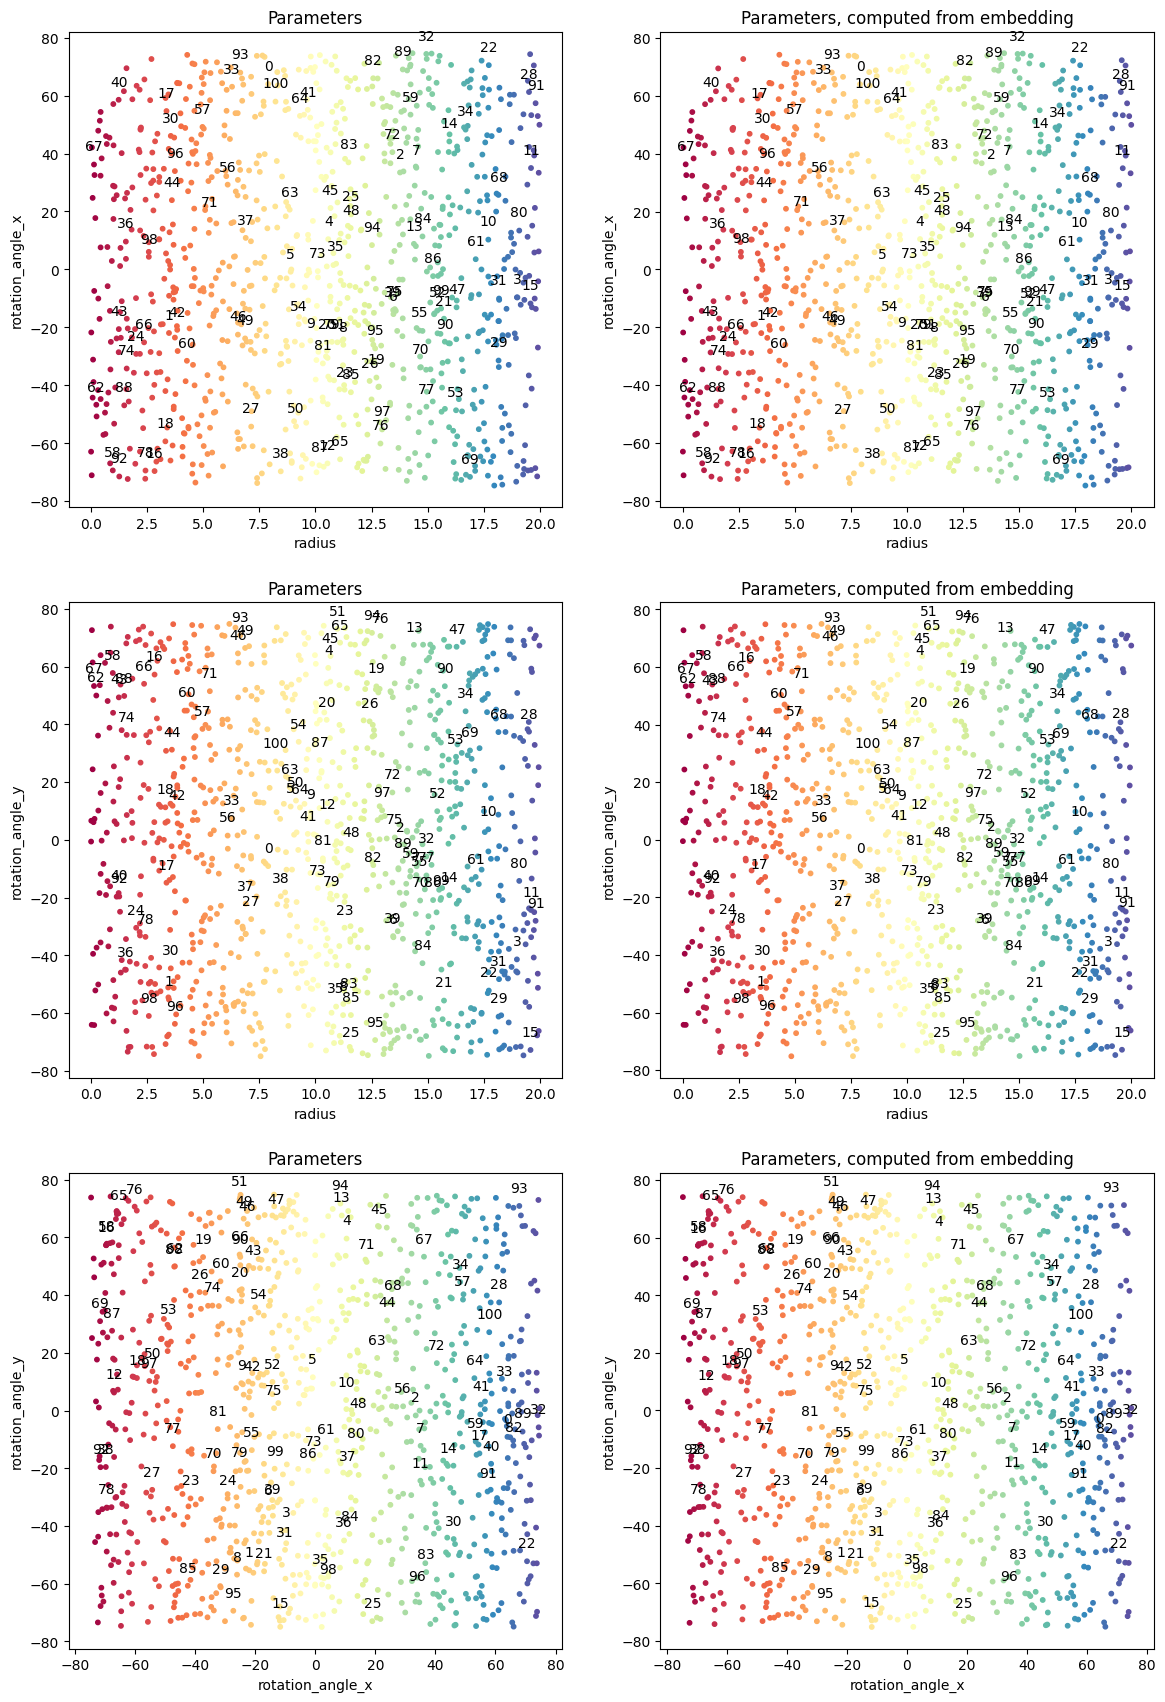

In [7]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [8]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=200, noise_level=0, pieces_cnt=5, test_data_size=10, same_value=False)

Finding neighbors: 273 ms , optimization: 1 ms
-----------
x_opt  = [  3.26804475 -50.20884162 -54.25620102], x_err = 0.00949601093085793
x_real = [  2.32671771 -47.56380899 -46.70304136]
Finding neighbors: 266 ms , optimization: 0 ms
-----------
x_opt  = [  3.48135601 -63.78032525 -57.46258908], x_err = 0.010760932773659786
x_real = [  3.22455128 -63.66969463 -54.73981493]
Finding neighbors: 266 ms , optimization: 1 ms
-----------
x_opt  = [  2.46139785 -61.78149003 -51.41538009], x_err = 0.015505141418513908
x_real = [  1.82797916 -61.3921852  -56.0237065 ]
Finding neighbors: 252 ms , optimization: 0 ms
-----------
x_opt  = [  1.6710696  -68.76451933 -52.67757101], x_err = 0.03242583814993618
x_real = [  0.77005302 -71.65056584 -51.07285544]
Finding neighbors: 255 ms , optimization: 1 ms
-----------
x_opt  = [  2.28026018 -65.44761569 -44.49114567], x_err = 0.008875503701336602
x_real = [  1.33998179 -60.64185759 -46.41093677]
Finding neighbors: 253 ms , optimization: 1 ms
----------

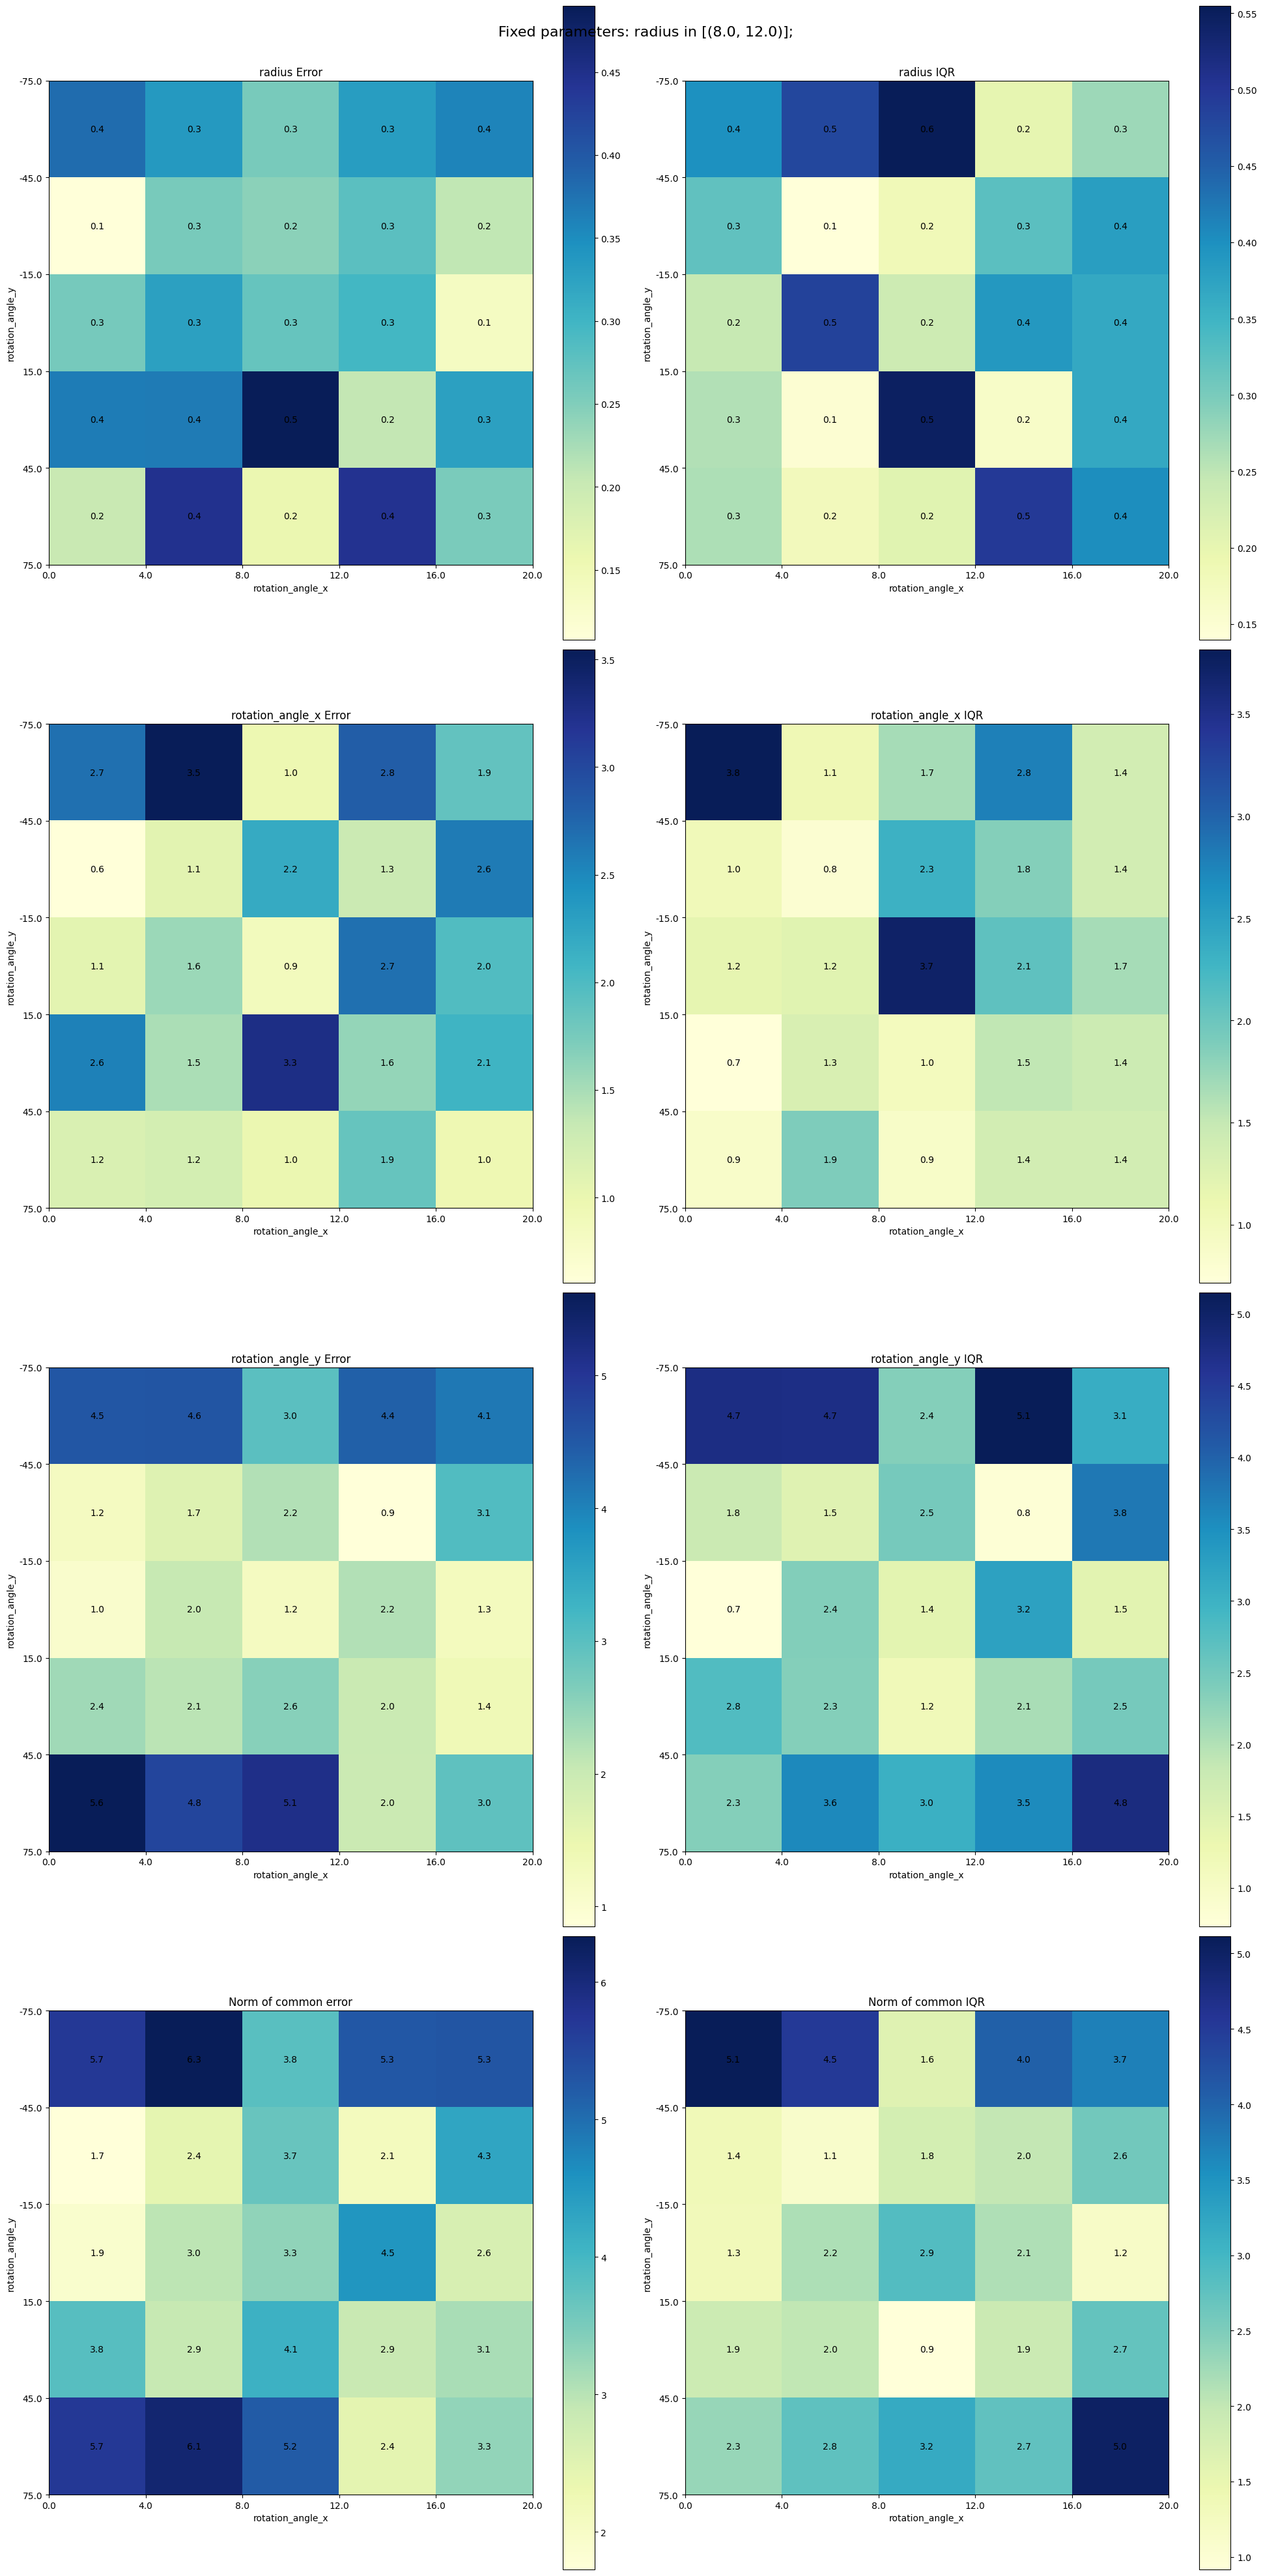

In [27]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map={0:2}, filename="./images/ch_cyl_3.png")